# Olympic Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# turn off pink boxes
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('athlete_events.csv')

In [3]:
df1 = pd.read_csv('noc_regions.csv')

In [4]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
df.shape

(271116, 15)

In [6]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [7]:
df1.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [8]:
df1.shape

(230, 3)

In [9]:
df1.isnull().sum()

NOC         0
region      3
notes     209
dtype: int64

In [10]:
def filter(x):
    if x == 'Gold' or x == 'Silver' or x =='Bronze':
        return 1
    else:
        return 0

In [11]:
df['medalist'] = df['Medal'].apply(filter)


In [12]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,medalist
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,0


In [13]:
df['BMI'] = round((df['Weight'] * 0.45359237) / ((df['Height'] / 100) ** 2), 1)

In [14]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,medalist,BMI
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,0,11.2
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,0,9.4
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,0,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,0,10.9


## Lets split our data

In [15]:
# train/validate/test split
train_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)

## Lets look at the nulls in the first dataframe

In [16]:
df.shape

(271116, 17)

In [17]:
df.isnull().sum()

ID               0
Name             0
Sex              0
Age           9474
Height       60171
Weight       62875
Team             0
NOC              0
Games            0
Year             0
Season           0
City             0
Sport            0
Event            0
Medal       231333
medalist         0
BMI          64263
dtype: int64

### lets look at age first

In [18]:
df.Age.describe()

count    261642.000000
mean         25.556898
std           6.393561
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64

## it appears there are likely some outliers, however it is likely safe to impute the nulls with the mean 

In [19]:
imputer = SimpleImputer(strategy='mean')
imputer = imputer.fit(train[['Age']])
train[['Age']] = imputer.transform(train[['Age']])

validate[['Age']] = imputer.transform(validate[['Age']])

test[['Age']] = imputer.transform(test[['Age']])

In [20]:
train.isnull().sum()

ID               0
Name             0
Sex              0
Age              0
Height       33482
Weight       35051
Team             0
NOC              0
Games            0
Year             0
Season           0
City             0
Sport            0
Event            0
Medal       129589
medalist         0
BMI          35818
dtype: int64

In [21]:
train.Age.describe()

count    151824.000000
mean         25.554600
std           6.283664
min          11.000000
25%          22.000000
50%          25.000000
75%          28.000000
max          88.000000
Name: Age, dtype: float64

## Lets look at the next nulls 


In [22]:
train.isnull().sum()

ID               0
Name             0
Sex              0
Age              0
Height       33482
Weight       35051
Team             0
NOC              0
Games            0
Year             0
Season           0
City             0
Sport            0
Event            0
Medal       129589
medalist         0
BMI          35818
dtype: int64

## I believe that height and weight nulls may be related to the year they played, so lets try that 


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151824 entries, 177199 to 175071
Data columns (total 17 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ID        151824 non-null  int64  
 1   Name      151824 non-null  object 
 2   Sex       151824 non-null  object 
 3   Age       151824 non-null  float64
 4   Height    118342 non-null  float64
 5   Weight    116773 non-null  float64
 6   Team      151824 non-null  object 
 7   NOC       151824 non-null  object 
 8   Games     151824 non-null  object 
 9   Year      151824 non-null  int64  
 10  Season    151824 non-null  object 
 11  City      151824 non-null  object 
 12  Sport     151824 non-null  object 
 13  Event     151824 non-null  object 
 14  Medal     22235 non-null   object 
 15  medalist  151824 non-null  int64  
 16  BMI       116006 non-null  float64
dtypes: float64(4), int64(3), object(10)
memory usage: 20.8+ MB


In [24]:
train.Year.value_counts()

1992    9140
1988    8245
2000    7906
2016    7702
1996    7672
2008    7612
2004    7536
2012    7218
1972    6808
1984    6419
1976    5942
1968    5825
1964    5259
1960    5248
1952    5212
1980    5038
1936    4133
1948    4107
1956    3596
1924    3145
1928    3124
2014    2741
2010    2463
2006    2426
1920    2395
2002    2320
1912    2253
1998    2038
1932    1882
1994    1747
1908    1743
1900    1011
1906     976
1904     725
1896     217
Name: Year, dtype: int64

In [25]:
train[(train['Year'] > 1960)].isnull().sum()

ID              0
Name            0
Sex             0
Age             0
Height       5696
Weight       6078
Team            0
NOC             0
Games           0
Year            0
Season          0
City            0
Sport           0
Event           0
Medal       96757
medalist        0
BMI          6376
dtype: int64

## It appears some where between 1950 and 1960 they started recording the height and weight more frequently 

## Lets drop the games before the year 1960, as we don't have much data we really cant afford to have a null in the weight and height of the athlete performing 

In [26]:
train = train[(train['Year'] > 1960)]
validate = validate[(validate['Year'] > 1960)]
test = test[(test['Year'] > 1960)]

In [27]:
train.isnull().sum()

ID              0
Name            0
Sex             0
Age             0
Height       5696
Weight       6078
Team            0
NOC             0
Games           0
Year            0
Season          0
City            0
Sport           0
Event           0
Medal       96757
medalist        0
BMI          6376
dtype: int64

In [28]:
train.shape

(112057, 17)

## Lets drop the remainin nulls in Height, Weight, and BMI

In [29]:
train.Medal = train.Medal.fillna('None')
validate.Medal = validate.Medal.fillna('None')
test.Medal = test.Medal.fillna('None')


In [30]:
train = train.dropna()
validate = validate.dropna()
test = test.dropna()

In [31]:
train.isnull().sum()

ID          0
Name        0
Sex         0
Age         0
Height      0
Weight      0
Team        0
NOC         0
Games       0
Year        0
Season      0
City        0
Sport       0
Event       0
Medal       0
medalist    0
BMI         0
dtype: int64

In [32]:
# train['medalist'] = train['Medal'].apply(filter)
# validate['medalist'] = validate['Medal'].apply(filter)
# test['medalist'] = test['Medal'].apply(filter)


In [33]:
train.isnull().sum()

ID          0
Name        0
Sex         0
Age         0
Height      0
Weight      0
Team        0
NOC         0
Games       0
Year        0
Season      0
City        0
Sport       0
Event       0
Medal       0
medalist    0
BMI         0
dtype: int64

In [35]:
train.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,medalist,BMI
177199,89088,Michael Omondi,M,26.0,168.0,70.0,Kenya,KEN,1988 Summer,1988,Summer,Seoul,Hockey,Hockey Men's Hockey,None,0,11.2
200426,100640,Hana n,F,19.0,157.0,40.0,Czechoslovakia,TCH,1988 Summer,1988,Summer,Seoul,Gymnastics,Gymnastics Women's Balance Beam,None,0,7.4
264622,132418,Yan Wing-Shean,M,22.0,173.0,72.0,Chinese Taipei,TPE,1988 Summer,1988,Summer,Seoul,Fencing,"Fencing Men's Foil, Individual",None,0,10.9
42842,22107,Beatrice Nicoleta Coad-Claru,F,16.0,170.0,64.0,Romania,ROU,1992 Summer,1992,Summer,Barcelona,Swimming,Swimming Women's 200 metres Breaststroke,None,0,10.0
42612,21983,Arnaud Clment,M,30.0,172.0,72.0,France-2,FRA,2008 Summer,2008,Summer,Beijing,Tennis,Tennis Men's Doubles,None,0,11.0


In [36]:
train.shape

(105681, 17)

Sex
M    69786
F    35895
Name: Sex, dtype: int64
M    66.034576
F    33.965424
Name: Sex, dtype: float64


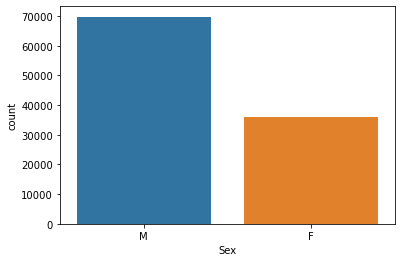

Team
United States         6291
Canada                4095
France                3831
Italy                 3803
Japan                 3760
                      ... 
Mutafo                   1
Solos Carex              1
India-1                  1
Lucky Star               1
Pousse-Moi Pas VII       1
Name: Team, Length: 414, dtype: int64
United States         5.952820
Canada                3.874869
France                3.625060
Italy                 3.598565
Japan                 3.557877
                        ...   
Mutafo                0.000946
Solos Carex           0.000946
India-1               0.000946
Lucky Star            0.000946
Pousse-Moi Pas VII    0.000946
Name: Team, Length: 414, dtype: float64


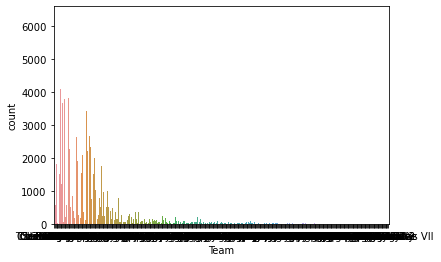

NOC
USA    6567
CAN    4261
ITA    3947
FRA    3910
JPN    3836
       ... 
KOS       4
KIR       3
TUV       2
SSD       2
YMD       2
Name: NOC, Length: 219, dtype: int64
USA    6.213984
CAN    4.031945
ITA    3.734825
FRA    3.699814
JPN    3.629792
         ...   
KOS    0.003785
KIR    0.002839
TUV    0.001892
SSD    0.001892
YMD    0.001892
Name: NOC, Length: 219, dtype: float64


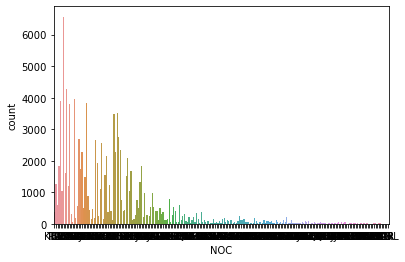

Games
2000 Summer    7809
2016 Summer    7573
2004 Summer    7509
2008 Summer    7501
2012 Summer    6997
1996 Summer    6599
1988 Summer    6542
1992 Summer    5748
1972 Summer    5606
1984 Summer    4978
1968 Summer    4717
1976 Summer    4672
1964 Summer    4132
1980 Summer    3922
2014 Winter    2612
2010 Winter    2448
2006 Winter    2417
2002 Winter    2295
1998 Winter    1986
1994 Winter    1651
1992 Winter    1563
1988 Winter    1144
1984 Winter    1071
1968 Winter    1009
1972 Winter     965
1980 Winter     750
1976 Winter     744
1964 Winter     721
Name: Games, dtype: int64
2000 Summer    7.389218
2016 Summer    7.165905
2004 Summer    7.105345
2008 Summer    7.097775
2012 Summer    6.620868
1996 Summer    6.244263
1988 Summer    6.190327
1992 Summer    5.439010
1972 Summer    5.304643
1984 Summer    4.710402
1968 Summer    4.463432
1976 Summer    4.420851
1964 Summer    3.909880
1980 Summer    3.711169
2014 Winter    2.471589
2010 Winter    2.316405
2006 Winter    2.287071


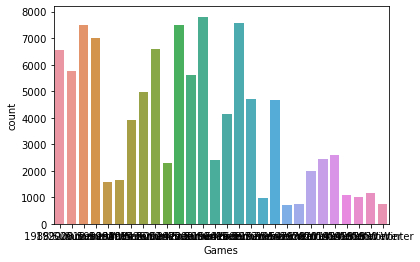

Year
2000    7809
1988    7686
2016    7573
2004    7509
2008    7501
1992    7311
2012    6997
1996    6599
1972    6571
1984    6049
1968    5726
1976    5416
1964    4853
1980    4672
2014    2612
2010    2448
2006    2417
2002    2295
1998    1986
1994    1651
Name: Year, dtype: int64
2000    7.389218
1988    7.272830
2016    7.165905
2004    7.105345
2008    7.097775
1992    6.917989
2012    6.620868
1996    6.244263
1972    6.217769
1984    5.723829
1968    5.418192
1976    5.124857
1964    4.592122
1980    4.420851
2014    2.471589
2010    2.316405
2006    2.287071
2002    2.171630
1998    1.879240
1994    1.562249
Name: Year, dtype: float64


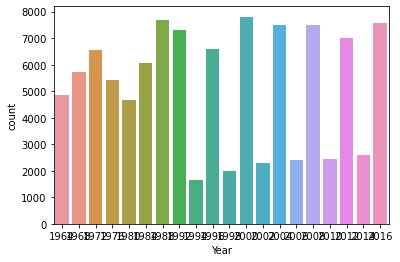

Season
Summer    84305
Winter    21376
Name: Season, dtype: int64
Summer    79.773091
Winter    20.226909
Name: Season, dtype: float64


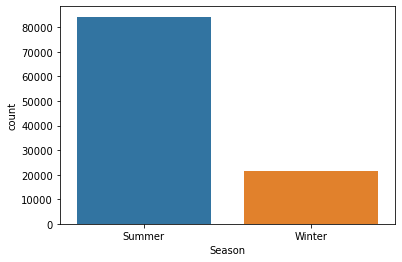

City
Sydney            7809
Rio de Janeiro    7573
Athina            7509
Beijing           7501
London            6997
Atlanta           6599
Seoul             6542
Barcelona         5748
Munich            5606
Los Angeles       4978
Mexico City       4717
Montreal          4672
Tokyo             4132
Moskva            3922
Sochi             2612
Vancouver         2448
Torino            2417
Salt Lake City    2295
Nagano            1986
Lillehammer       1651
Albertville       1563
Innsbruck         1465
Calgary           1144
Sarajevo          1071
Grenoble          1009
Sapporo            965
Lake Placid        750
Name: City, dtype: int64
Sydney            7.389218
Rio de Janeiro    7.165905
Athina            7.105345
Beijing           7.097775
London            6.620868
Atlanta           6.244263
Seoul             6.190327
Barcelona         5.439010
Munich            5.304643
Los Angeles       4.710402
Mexico City       4.463432
Montreal          4.420851
Tokyo             3.90988

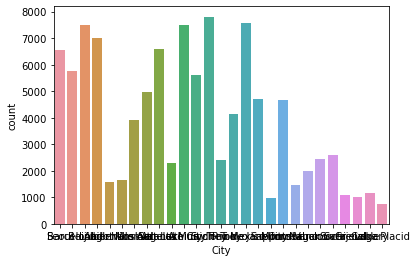

Sport
Athletics                    14626
Swimming                     10108
Gymnastics                    8815
Cross Country Skiing          4045
Rowing                        4002
Cycling                       3980
Shooting                      3812
Alpine Skiing                 3373
Fencing                       3065
Canoeing                      2897
Wrestling                     2651
Biathlon                      2577
Sailing                       2479
Ice Hockey                    2423
Speed Skating                 2323
Football                      2294
Equestrianism                 2283
Boxing                        2265
Hockey                        2222
Handball                      1928
Judo                          1861
Basketball                    1856
Volleyball                    1842
Weightlifting                 1536
Water Polo                    1400
Bobsleigh                     1181
Tennis                        1112
Archery                       1070
Ski Jumping   

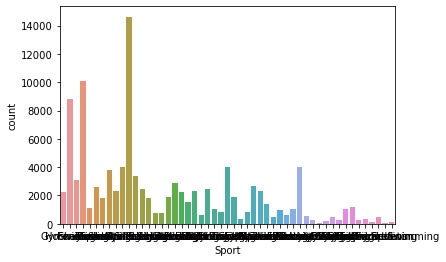

Event
Ice Hockey Men's Ice Hockey                       2004
Football Men's Football                           1727
Hockey Men's Hockey                               1451
Handball Men's Handball                           1181
Basketball Men's Basketball                       1176
                                                  ... 
Snowboarding Men's Slopestyle                       12
Wrestling Women's Light-Heavyweight, Freestyle      11
Wrestling Women's Featherweight, Freestyle          11
Freestyle Skiing Women's Halfpipe                   11
Boxing Women's Middleweight                         10
Name: Event, Length: 486, dtype: int64
Ice Hockey Men's Ice Hockey                       1.896273
Football Men's Football                           1.634163
Hockey Men's Hockey                               1.373000
Handball Men's Handball                           1.117514
Basketball Men's Basketball                       1.112783
                                                    ...

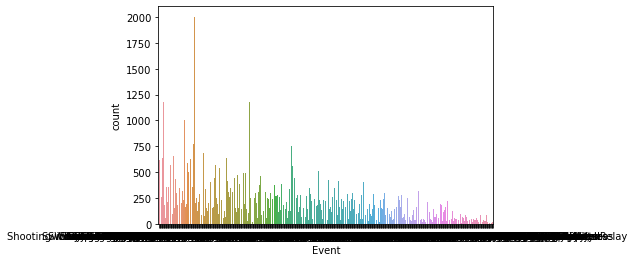

Medal
None      90730
Bronze     5113
Silver     4947
Gold       4891
Name: Medal, dtype: int64
None      85.852708
Bronze     4.838145
Silver     4.681068
Gold       4.628079
Name: Medal, dtype: float64


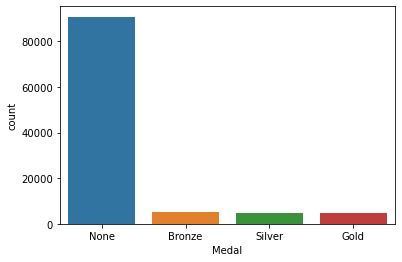

medalist
0    90730
1    14951
Name: medalist, dtype: int64
0    85.852708
1    14.147292
Name: medalist, dtype: float64


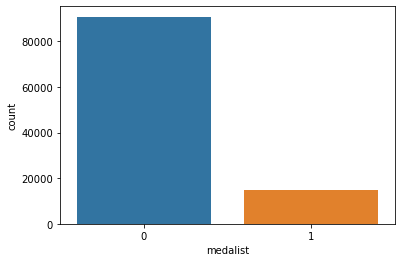

In [38]:
num_vars = ['Age', 'Height', 'Weight', 'BMI']
cat_vars = ['Sex', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'medalist']

for col in cat_vars:
    print(col)
    print(train[col].value_counts())
    print(train[col].value_counts(normalize=True)*100)
    sns.countplot(x=col, data=train)
    plt.show()

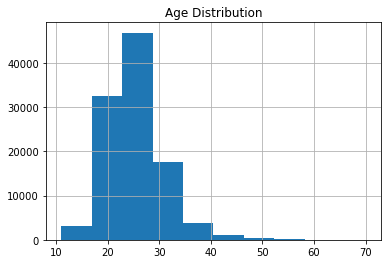

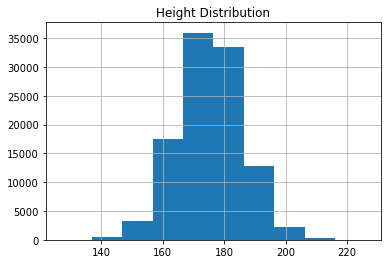

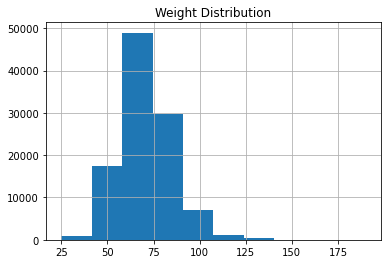

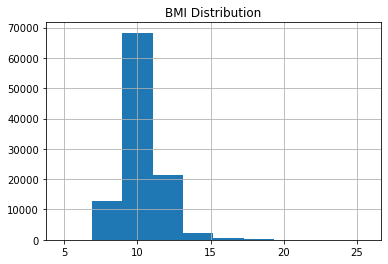

In [39]:
for col in num_vars:
    train[col].hist()
    plt.title(col+' Distribution')
    plt.show()